# 토끼 데이터 분석
- 최종 분석 결과
- R-squared: 0.619
- 독립변수 : sleep_score + yesterday_satisfaction + C(morning_routine) + C(gotobed_range)
- 결론 : 종속변수(오늘의 점수)를 높이기 위해서는 수면점수, 어제 만족도를 높이고, 모닝루틴을 지키면서 잠 자러가는 시간대를 02시 이전으로 하자!

# 데이터 불러오기

In [2]:
import pandas as pd
df = pd.read_excel("today_score_data.xlsx")
df

,cnt,name,today_score,date,dayofweek,dayofweek_check,avg_temp,low_temp,high_temp,precipitation,...,yesterday_exercise_time,yesterday_step_cnt,yesterday_drinking,period,caffeine,yesterday_satisfaction,gotobed_range,getup_range,gotobed_late,getup_early
0,1,quokka,9,2022-09-28,4,0,20.4,16.1,26.1,0.0,...,70,11772,0,0,0,2,03시대,08시대,1,0
1,2,quokka,6,2022-09-29,5,0,20.4,16.4,26.5,0.0,...,0,5800,0,0,0,3,03시대,08시대,1,0
2,3,quokka,4,2022-09-30,6,0,20.7,14.8,27.7,0.0,...,0,2775,0,0,0,4,05시대,10시대,1,0
3,4,quokka,7,2022-10-01,7,1,20.9,14.4,27.6,0.0,...,0,4365,0,0,0,3,05시대,07시대,1,1
4,5,quokka,7,2022-10-02,1,1,19.4,17.2,21.6,15.8,...,0,13541,0,0,1,4,03시대,10시대,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,rabbit,7,2022-11-10,5,0,13.5,8.8,19.1,0.0,...,0,2800,0,0,1,3,00시대,07시대,0,1
236,237,rabbit,8,2022-11-11,6,0,15.6,10.9,22.1,0.0,...,0,5503,0,0,1,4,01시대,10시대,0,0
237,238,rabbit,9,2022-11-12,7,1,16.3,11.6,22.0,57.9,...,0,4261,0,0,1,3,20시대,10시대,0,0
238,239,rabbit,9,2022-11-13,1,1,10.3,8.7,17.3,0.0,...,0,7500,0,0,1,4,02시대,08시대,1,0


In [3]:
# 결측치 제거
df.dropna

<bound method DataFrame.dropna of      cnt    name  today_score       date  dayofweek  dayofweek_check  \
0      1  quokka            9 2022-09-28          4                0   
1      2  quokka            6 2022-09-29          5                0   
2      3  quokka            4 2022-09-30          6                0   
3      4  quokka            7 2022-10-01          7                1   
4      5  quokka            7 2022-10-02          1                1   
..   ...     ...          ...        ...        ...              ...   
235  236  rabbit            7 2022-11-10          5                0   
236  237  rabbit            8 2022-11-11          6                0   
237  238  rabbit            9 2022-11-12          7                1   
238  239  rabbit            9 2022-11-13          1                1   
239  240  rabbit            9 2022-11-14          2                0   

     avg_temp  low_temp  high_temp  precipitation  ...  \
0        20.4      16.1       26.1         

# 컬럼 정보
### 종속변수
- today_score : 오늘 나의 점수

### 독립변수
- name : 닉네임
- date : 날짜
- dayofweek : 요일
- dayofweek_check : 주말 여부
- class_check : 수업 여부
- gotobed_time : 취침 시간
- gotobed_range : 취침 시간대
- gotobed_late : 늦게 취침 했는지 여부
- getup_time : 기상 시간
- getup_range : 기상 시간대
- getup_early : 일찍 기상했는지 여부
- sleep_time : 수면시간
- morning_routine : 모닝 루틴 실행 여부
- weather_prefer : 날씨 선호 여부
- sleep_score : 수면점수
- yesterday_exercise : 전일 운동 여부
- yesterday_exercise_time : 전일 운동 시간
- yesterday_step_cnt : 전날 걸음 수
- yesterday_drinking : 전날 음주 여부
- period : 생리 여부
- caffeine : 카페인 섭취 여부
- yesterday_satisfaction : 전날 하루의 만족도 / 전날의 기분
- avg_temp : 평균기온(°C)
- low_temp : 최저기온(°C)
- high_temp : 최고기온(°C)
- precipitation : 강수량(mm)
- precipitation_check : 강수 여부

# 토끼 데이터만 가져오기

In [4]:
rb = df[df['name']=='rabbit']
rb

,cnt,name,today_score,date,dayofweek,dayofweek_check,avg_temp,low_temp,high_temp,precipitation,...,yesterday_exercise_time,yesterday_step_cnt,yesterday_drinking,period,caffeine,yesterday_satisfaction,gotobed_range,getup_range,gotobed_late,getup_early
192,193,rabbit,9,2022-09-28,4,0,20.4,16.1,26.1,0.00,...,0,4500,0,0,1,4,02시대,09시대,1,0
193,194,rabbit,5,2022-09-29,5,0,20.4,16.4,26.5,0.00,...,0,3000,0,0,1,3,04시대,09시대,1,0
194,195,rabbit,7,2022-09-30,6,0,20.7,14.8,27.7,0.00,...,0,3215,0,0,1,2,02시대,09시대,1,0
195,196,rabbit,4,2022-10-01,7,1,20.9,14.4,27.6,0.00,...,0,5621,0,0,1,2,02시대,10시대,1,0
196,197,rabbit,6,2022-10-02,1,1,19.4,17.2,21.6,15.80,...,0,5342,0,0,1,2,02시대,09시대,1,0
197,198,rabbit,8,2022-10-03,2,0,21.4,17.5,23.4,76.00,...,0,13429,1,0,1,2,01시대,09시대,0,0
198,199,rabbit,5,2022-10-04,3,0,17.9,14.2,23.0,11.80,...,0,12748,0,0,0,2,01시대,08시대,0,0
199,200,rabbit,5,2022-10-05,4,0,16.6,14.1,21.6,0.10,...,0,2669,0,0,1,1,03시대,09시대,1,0
200,201,rabbit,6,2022-10-06,5,0,15.8,12.7,19.1,0.01,...,0,3681,0,0,1,1,03시대,05시대,1,1
201,202,rabbit,8,2022-10-07,6,0,14.3,11.0,18.6,0.00,...,0,6187,0,0,0,3,20시대,06시대,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cnt                      240 non-null    int64         
 1   name                     240 non-null    object        
 2   today_score              240 non-null    int64         
 3   date                     240 non-null    datetime64[ns]
 4   dayofweek                240 non-null    int64         
 5   dayofweek_check          240 non-null    int64         
 6   avg_temp                 240 non-null    float64       
 7   low_temp                 240 non-null    float64       
 8   high_temp                240 non-null    float64       
 9   precipitation            240 non-null    float64       
 10  precipitation_check      240 non-null    int64         
 11  class_check              240 non-null    int64         
 12  gotobed_time             240 non-nul

# 데이터 타입 변경
- 범주형 변수 -> object

In [6]:
category = ['dayofweek','dayofweek_check','class_check','morning_routine','weather_prefer','yesterday_exercise',
       'yesterday_drinking','period','caffeine','precipitation_check','gotobed_late','getup_early']

for c in category:
    rb[c] = rb[c].astype(object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [7]:
rb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 192 to 239
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cnt                      48 non-null     int64         
 1   name                     48 non-null     object        
 2   today_score              48 non-null     int64         
 3   date                     48 non-null     datetime64[ns]
 4   dayofweek                48 non-null     object        
 5   dayofweek_check          48 non-null     object        
 6   avg_temp                 48 non-null     float64       
 7   low_temp                 48 non-null     float64       
 8   high_temp                48 non-null     float64       
 9   precipitation            48 non-null     float64       
 10  precipitation_check      48 non-null     object        
 11  class_check              48 non-null     object        
 12  gotobed_time             48 non-nul

# 토끼 데이터 탐색

In [8]:
pd.options.display.max_columns = None # 모든 컬럼 보이도록 함

rb.describe() 

,cnt,today_score,avg_temp,low_temp,high_temp,precipitation,sleep_time,sleep_score,yesterday_exercise_time,yesterday_step_cnt,yesterday_satisfaction
count,48.00,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,216.50,6.541667,13.929167,9.595833,19.250000,3.792500,404.208333,2.812500,1.145833,4618.166667,2.729167
std,14.00,1.486941,3.762636,3.929591,4.017197,14.023592,131.186558,0.789728,7.938566,2796.985431,0.818394
min,193.00,2.000000,4.900000,0.800000,9.800000,0.000000,63.000000,1.000000,0.000000,1403.000000,1.000000
25%,204.75,5.750000,11.175000,6.650000,16.550000,0.000000,320.000000,2.000000,0.000000,3096.250000,2.000000
50%,216.50,7.000000,13.550000,9.550000,19.100000,0.000000,410.000000,3.000000,0.000000,3899.500000,3.000000
75%,228.25,8.000000,16.300000,11.800000,21.600000,0.000000,482.500000,3.000000,0.000000,5226.500000,3.000000
max,240.00,9.000000,21.400000,17.500000,27.700000,76.000000,750.000000,4.000000,55.000000,15691.000000,4.000000


- 종속변수
1. 평균 : 6.54
2. min : 2.00
3. max : 9.00

## 종속변수 분포 확인
- today_score	

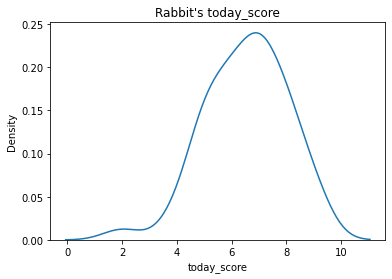

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

x = rb['today_score']
sns.kdeplot(x) # kde : 분포의 곡선을 보여줌 
plt.title("Rabbit's today_score")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


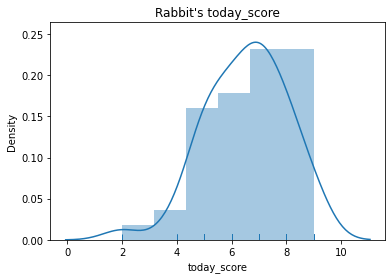

In [10]:
sns.distplot(x, kde=True, rug=True) # rug : 데이터의 위치를 x축 위에 표시
plt.title("Rabbit's today_score")
plt.show()

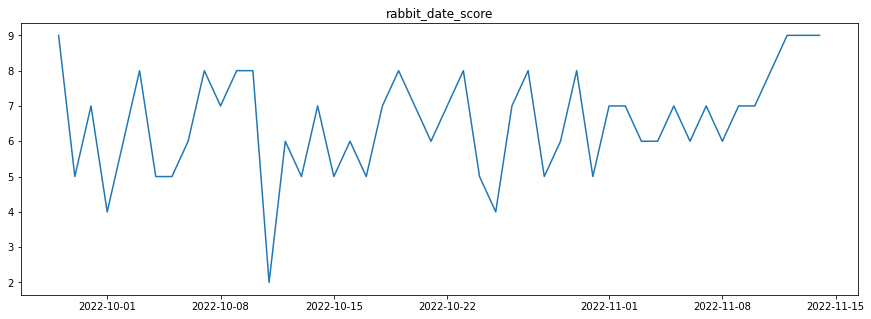

In [11]:


plt.figure(figsize=(15,5))
plt.title('rabbit_date_score')
plt.plot(rb['date'],rb['today_score'])

KeyboardInterrupt: ignored

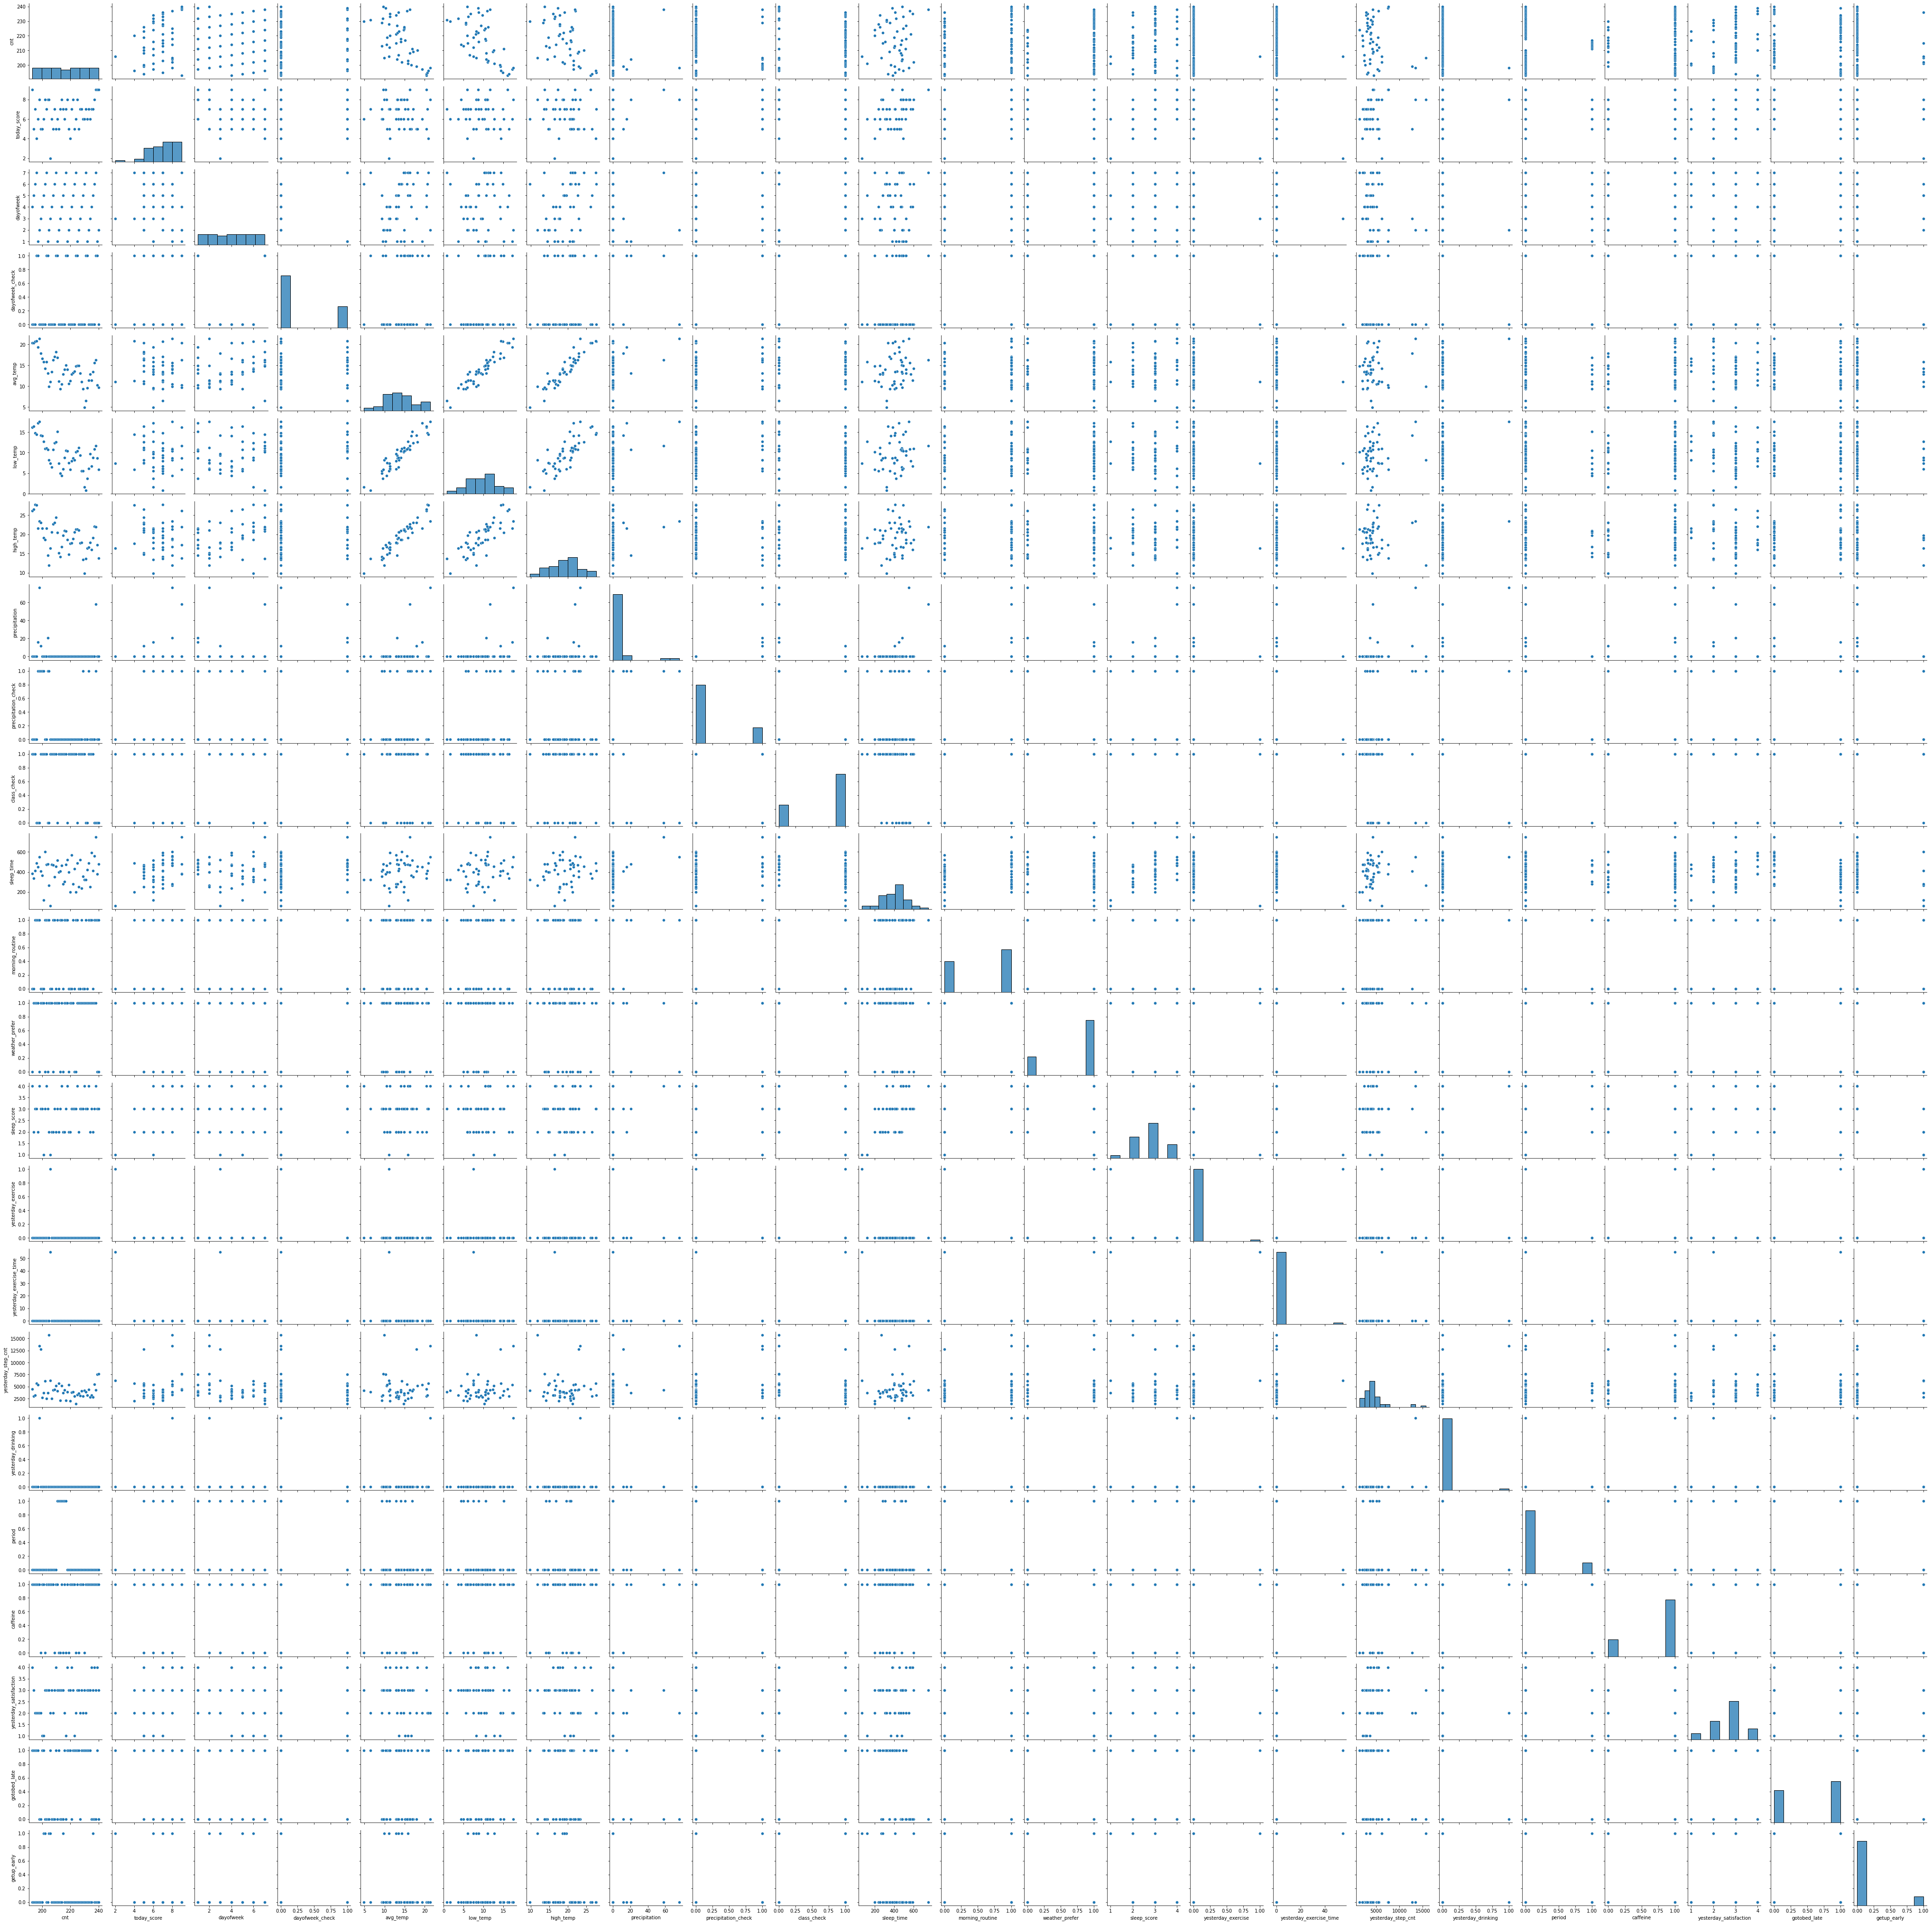

In [12]:
sns.pairplot(rb) # 범주형에는 의미가 없음 

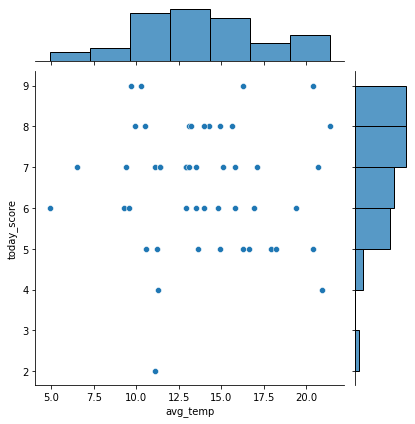

In [13]:
# 평균기온(avg_temp)에 따른 종속변수(today_score) 변화
sns.jointplot(x=rb['avg_temp'], y=rb['today_score'], kind = 'scatter')

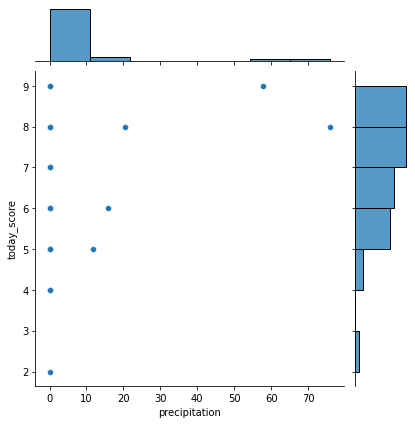

In [14]:
# 강수량(precipitation)에 따른 종속변수(today_score) 변화
sns.jointplot(x=rb['precipitation'], y=rb['today_score'], kind = 'scatter')

## 독립변수 분포 확인
- 수치형 변수
- 독립형 변수

### 1.수치형 변수

In [15]:
# 수치형 변수 출력
int_variable= [v for v in rb.columns if rb[v].dtypes =="int64"]
float_variable= [v for v in rb.columns if rb[v].dtypes =="float64"]
num = float_variable + int_variable
num.remove('cnt') # 의미 없는 변수 제거
num.remove('today_score')
num

['avg_temp',
 'low_temp',
 'high_temp',
 'precipitation',
 'sleep_time',
 'sleep_score',
 'yesterday_exercise_time',
 'yesterday_step_cnt',
 'yesterday_satisfaction']

In [ ]:
# 시각화
for v in num : 
    x = rb[v]
    sns.distplot(x, kde=True, rug=True)
    plt.show()

In [ ]:
# 수치형 데이터 DataFrame 생성
rb_int = rb[['avg_temp',
 'low_temp',
 'high_temp',
 'precipitation',
 'sleep_time',
 'sleep_score',
 'yesterday_exercise_time',
 'yesterday_step_cnt',
 'yesterday_satisfaction']]

In [ ]:
#sns.pairplot(rb_int)

### 1.1.날씨 데이터 분석

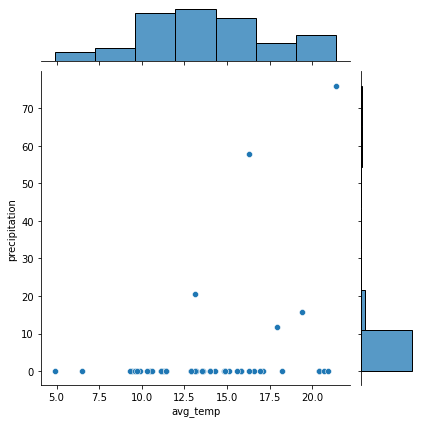

In [16]:
# 평균기온(avg_temp)에 따른 강수량(precipitation) 분포 확인
sns.jointplot(x=rb['avg_temp'], y=rb['precipitation'], kind = 'scatter')

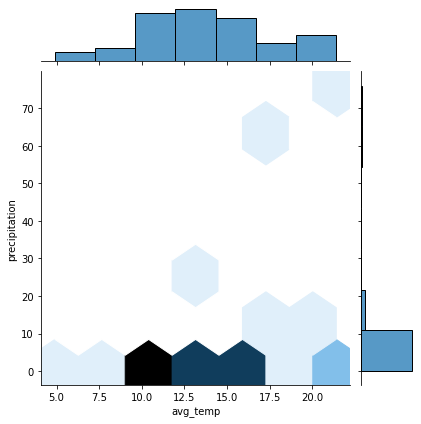

In [17]:
# 평균기온(avg_temp)에 따른 강수량(precipitation) 밀집도 확인
sns.jointplot(x=rb['avg_temp'], y=rb['precipitation'], kind = 'hex')

### 2. 범주형 변수

In [18]:
# 범주형 변수 출력
cat_variable= [v for v in rb.columns if rb[v].dtypes =="object"]
cat_variable.remove('name') # 의미 없는 변수 제거
cat_variable.remove('gotobed_time')
cat_variable.remove('getup_time')
cat_variable.remove('precipitation_check')
cat_variable.remove('class_check')
cat_variable

['dayofweek',
 'dayofweek_check',
 'morning_routine',
 'weather_prefer',
 'yesterday_exercise',
 'yesterday_drinking',
 'period',
 'caffeine',
 'gotobed_range',
 'getup_range',
 'gotobed_late',
 'getup_early']

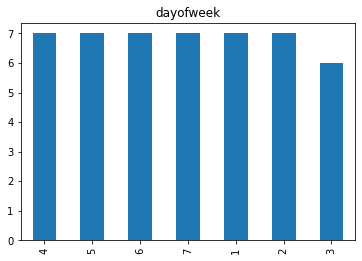

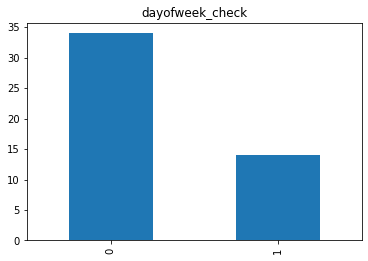

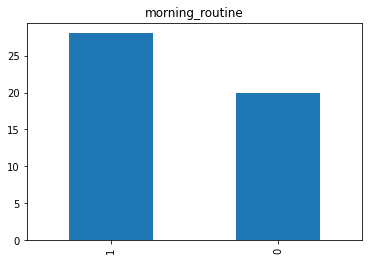

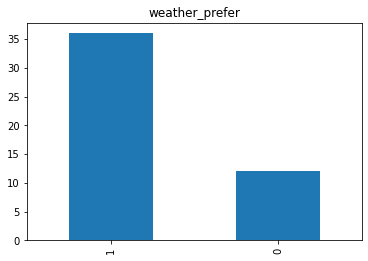

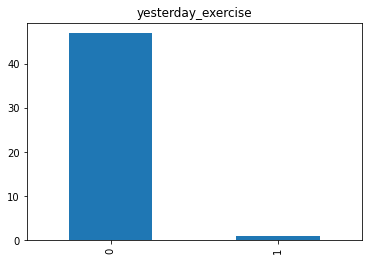

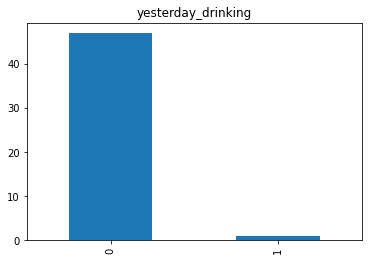

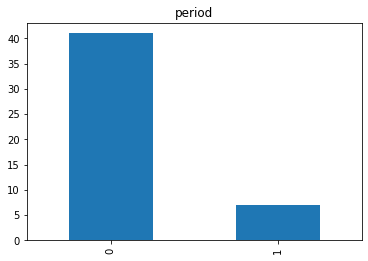

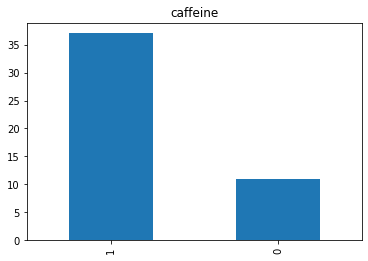

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)


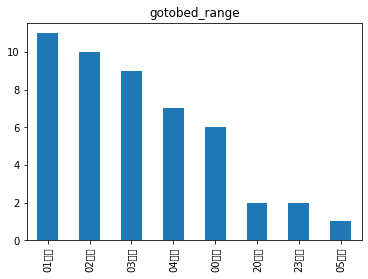

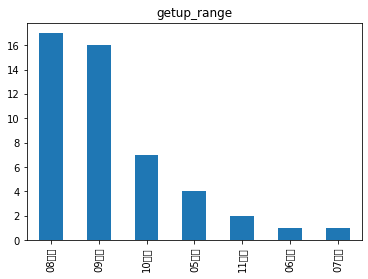

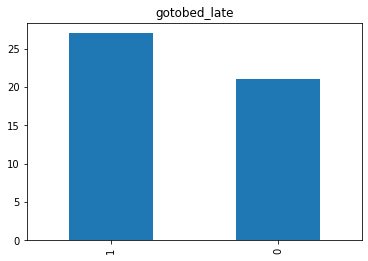

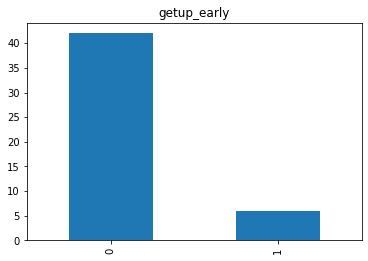

In [19]:
for c in cat_variable :
    rb[c].value_counts().plot(kind='bar')
    plt.title(c)
    plt.show()

# 상관분석
: 두 변수 간에 어떤 선형적 관계를 가지는지 분석하는 기법으로, 상관계수(x와 y가 함께 변하는 정도)를 이용하여 측정한다.
- 종속변수(today_score)에 영향이 큰 변수 : 수면점수(sleep_score),수면시간(sleep_time)어제만족도(yesterday_satisfaction)
- 종속변수(today_score)에 영향이 보통인 변수 : 강수량(precipitation)
- 종속변수(today_score)에 영향이 적은 변수 : 온도(low_temp,avg_temp,high_temp)

#### 기준 
- 큼 : |r| > 0.4  
- 보통 : 0.2 < |r| < 0.4 
- 작음 : |r| < 0.2              
- 선형의 상관관계가 아님 : r = 0 

In [20]:
rb.corr()

,cnt,today_score,avg_temp,low_temp,high_temp,precipitation,sleep_time,sleep_score,yesterday_exercise_time,yesterday_step_cnt,yesterday_satisfaction
cnt,1.000000,0.272893,-0.635629,-0.632331,-0.502588,-0.101043,0.098180,0.168385,-0.110556,-0.230961,0.296191
today_score,0.272893,1.000000,-0.060308,-0.021089,-0.109351,0.261235,0.467225,0.595658,-0.450240,0.154789,0.402865
avg_temp,-0.635629,-0.060308,1.000000,0.942816,0.931777,0.331296,0.233039,0.015484,-0.110838,0.090814,-0.163899
low_temp,-0.632331,-0.021089,0.942816,1.000000,0.793192,0.352950,0.197468,-0.010541,-0.082371,0.202506,-0.157818
high_temp,-0.502588,-0.109351,0.931777,0.793192,1.000000,0.173421,0.174100,0.030515,-0.104579,-0.073790,-0.136229
precipitation,-0.101043,0.261235,0.331296,0.352950,0.173421,1.000000,0.385220,0.292426,-0.039865,0.399669,-0.101087
sleep_time,0.098180,0.467225,0.233039,0.197468,0.174100,0.385220,1.000000,0.569463,-0.383401,0.054150,0.276793
sleep_score,0.168385,0.595658,0.015484,-0.010541,0.030515,0.292426,0.569463,1.000000,-0.338317,0.009618,0.216039
yesterday_exercise_time,-0.110556,-0.450240,-0.110838,-0.082371,-0.104579,-0.039865,-0.383401,-0.338317,1.000000,0.085317,-0.131337
yesterday_step_cnt,-0.230961,0.154789,0.090814,0.202506,-0.073790,0.399669,0.054150,0.009618,0.085317,1.000000,0.038092


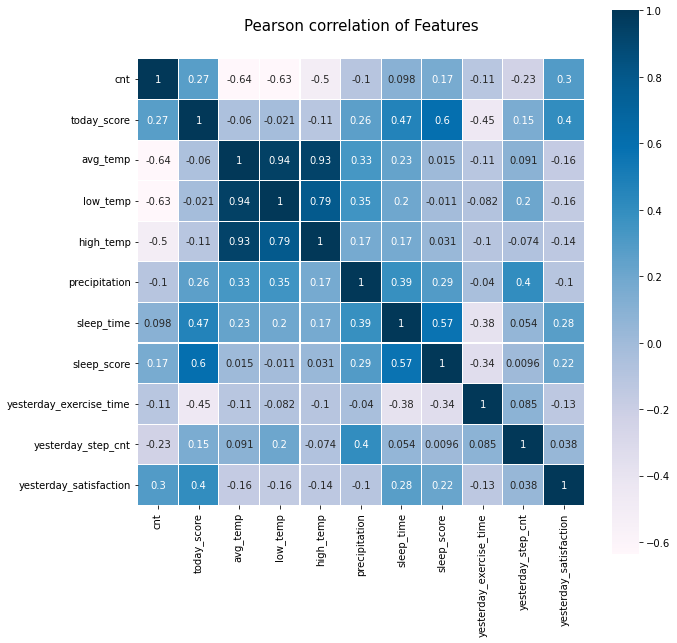

In [21]:
# 히트맵
colormap = plt.cm.PuBu
plt.figure(figsize=(10,10))
plt.title("Pearson correlation of Features",y = 1.05, size = 15)
sns.heatmap(rb.corr(), linewidths=0.1,vmax=1.0,
            square= True, cmap=colormap, linecolor="white", annot = True) 

#### 종속변수 외 변수 간 상관분석 해석
- (* 운동을 전체 기간 동안 하루 진행했기 때문에 운동 시간(excercise_time) 의미 없는 변수로서 활용하지 않음)
1. 평균 기온(avg_temp)과 최저 기온(low_temp), 최고 기온(high_temp)은 강한 상관관계를 보인다.(0.94)
2. 강수량(precipitation)과 어제 걸음수(yesterday_step_cnt)의 상관관계가 있다(0.4), 강수량(precipitation)과 온도(avg_temp,low_temp)은 상관관계가 있다(0.33, 0.35)
3. 잠자는 시간(sleep_time)과 수면 점수(sleep_score)는 상관관계가 높다.(0.57)


# 왜도 확인
- -2 < 왜도 < 2 : 정규분포 만족
- 정규분포가 아닌 것은 log 씌우기

In [22]:
rb.skew() # 범주형 변수 제외 : yesterday_step_cnt, precipitation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


cnt                        0.000000
today_score               -0.489554
dayofweek                 -0.029393
dayofweek_check            0.946538
avg_temp                   0.096425
low_temp                   0.066712
high_temp                  0.016375
precipitation              4.342097
precipitation_check        1.483126
class_check               -0.946538
sleep_time                -0.253311
morning_routine           -0.349066
weather_prefer            -1.192288
sleep_score               -0.189111
yesterday_exercise         6.928203
yesterday_exercise_time    6.928203
yesterday_step_cnt         2.525817
yesterday_drinking         6.928203
period                     2.072286
caffeine                  -1.330724
yesterday_satisfaction    -0.424061
gotobed_late              -0.260179
getup_early                2.341607
dtype: float64

- yesterday_step_cnt, precipitation에 log 씌우기

# 회귀분석
- 단순회귀분석
- 다중회귀분석

## 1. 수치형 변수 

In [24]:
num

['avg_temp',
 'low_temp',
 'high_temp',
 'precipitation',
 'sleep_time',
 'sleep_score',
 'yesterday_exercise_time',
 'yesterday_step_cnt',
 'yesterday_satisfaction']

### 1) avg_temp : 평균 기온 (℃)
- 결론 : 종속변수(오늘의 점수)는 평균 기온에 영향을 받지 않는다는 귀무가설 채택

In [28]:
from statsmodels.formula.api import ols
ols('today_score ~ avg_temp', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.1679
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.684
Time:                        13:56:10   Log-Likelihood:                -86.559
No. Observations:                  48   AIC:                             177.1
Df Residuals:                      46   BIC:                             180.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8736      0.839      8.197      0.000       5.186       8.562
avg_temp      -0.0238      0.058     -0.410      0.684      -0.141       0.093
==============================================================================
Omnibus:                        3.192   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.203   Jarque-Bera (JB):                2.180
Skew:                          -0.473   Prob(JB):                        0.336
Kurtosis:                       3.441   Cond. No.                         56.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2) low_temp : 최저 기온 (℃)
- 결론 : 종속변수(오늘의 점수)는 최저 기온에 영향을 받지 않는다는 귀무가설 채택. 전혀 영향이 없음.
- R-squared:	0.000

In [29]:
ols('today_score ~ low_temp', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                   0.02047
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.887
Time:                        13:58:01   Log-Likelihood:                -86.636
No. Observations:                  48   AIC:                             177.3
Df Residuals:                      46   BIC:                             181.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6182      0.578     11.460      0.000       5.456       7.781
low_temp      -0.0080      0.056     -0.143      0.887      -0.120       0.104
==============================================================================
Omnibus:                        2.959   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                2.023
Skew:                          -0.470   Prob(JB):                        0.364
Kurtosis:                       3.359   Cond. No.                         27.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3) high_temp : 최고 기온 (℃)
- 결론 : 종속변수(오늘의 점수)는 최저 기온에 영향을 받지 않는다는 귀무가설 채택.

In [30]:
ols('today_score ~ high_temp', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5567
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.459
Time:                        13:59:25   Log-Likelihood:                -86.358
No. Observations:                  48   AIC:                             176.7
Df Residuals:                      46   BIC:                             180.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3208      1.066      6.866      0.000       5.174       9.467
high_temp     -0.0405      0.054     -0.746      0.459      -0.150       0.069
==============================================================================
Omnibus:                        3.506   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.173   Jarque-Bera (JB):                2.417
Skew:                          -0.471   Prob(JB):                        0.299
Kurtosis:                       3.567   Cond. No.                         97.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4) precipitation : 강수량 (mm)
- 결론 : 종속변수(오늘의 점수)는 강수량에 영향을 받지 않는다는 귀무가설 채택.

In [34]:
import numpy as np
ols('today_score ~  np.log1p(precipitation)', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.008
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.163
Time:                        14:01:51   Log-Likelihood:                -85.621
No. Observations:                  48   AIC:                             175.2
Df Residuals:                      46   BIC:                             179.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   6.4406      0.224     28.752      0.000       5.990       6.892
np.log1p(precipitation)     0.2855      0.201      1.417      0.163      -0.120       0.691
==============================================================================
Omnibus:                        3.213   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.201   Jarque-Bera (JB):                2.252
Skew:                          -0.498   Prob(JB):                        0.324
Kurtosis:                       3.364   Cond. No.                         1.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5) sleep_time : 수면 시간
- 결론 : 종속변수(오늘의 점수)는 수면 시간에 영향을 받지 않는다는 귀무가설 기각. 
- R-squared:	0.218
- 전체 데이터(0.11) 보다 수면 시간 설명력이 높기 때문에 종속변수에 영향을 주는 변수로 채택함.

In [35]:
ols('today_score ~ sleep_time', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     12.85
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           0.000814
Time:                        14:03:21   Log-Likelihood:                -80.736
No. Observations:                  48   AIC:                             165.5
Df Residuals:                      46   BIC:                             169.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4011      0.627      7.016      0.000       3.138       5.664
sleep_time     0.0053      0.001      3.584      0.001       0.002       0.008
==============================================================================
Omnibus:                        0.233   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.890   Jarque-Bera (JB):                0.418
Skew:                          -0.110   Prob(JB):                        0.812
Kurtosis:                       2.600   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 6) sleep_score : 수면 점수
- 결론 : 종속변수(오늘의 점수)는 수면 점수에 영향을 받지 않는다는 귀무가설 기각. 수면점수가 1점 높아질수록 1.12점 증가.
- 전체데이터(0.29)보다 수면점수의 설명력이 높기 때문에, 종속변수에 영향을 주는 변수로 채택.

In [36]:
 ols('today_score ~ sleep_score', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     25.30
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           7.96e-06
Time:                        14:06:32   Log-Likelihood:                -76.129
No. Observations:                  48   AIC:                             156.3
Df Residuals:                      46   BIC:                             160.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.3873      0.651      5.204      0.000       2.077       4.698
sleep_score     1.1215      0.223      5.030      0.000       0.673       1.570
==============================================================================
Omnibus:                        0.261   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.878   Jarque-Bera (JB):                0.353
Skew:                          -0.161   Prob(JB):                        0.838
Kurtosis:                       2.730   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 7) yesterday_step_cnt : 전날 걸음 수
- 결론 : 종속변수(오늘의 점수)는 에 전날 걸음 수에 영향을 받지 않는다는 귀무가설 채택. 

In [37]:
ols('today_score ~ yesterday_step_cnt', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.129
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.293
Time:                        14:09:33   Log-Likelihood:                -86.064
No. Observations:                  48   AIC:                             176.1
Df Residuals:                      46   BIC:                             179.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.1616      0.417     14.779      0.000       5.322       7.001
yesterday_step_cnt  8.229e-05   7.74e-05      1.063      0.293   -7.36e-05       0.000
==============================================================================
Omnibus:                        5.258   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.080
Skew:                          -0.640   Prob(JB):                        0.130
Kurtosis:                       3.633   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 8) yesterday_satisfaction : 전날 만족도 
- 결론 : 종속변수(오늘의 점수)는 전날 만족도에 영향을 받지 않는다는 귀무가설 기각. 1점 증가할 때 0.73 증가.
- 전체 데이터(0.15) 보다 전날 만족도 설명력이 높기 때문에, 종속변수에 영향을 주는 변수로 채택.

In [38]:
ols('today_score ~ yesterday_satisfaction', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     8.912
Date:                Thu, 24 Nov 2022   Prob (F-statistic):            0.00453
Time:                        14:11:00   Log-Likelihood:                -82.396
No. Observations:                  48   AIC:                             168.8
Df Residuals:                      46   BIC:                             172.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.5440      0.698      6.510      0.000       3.139       5.949
yesterday_satisfaction     0.7320      0.245      2.985      0.005       0.238       1.226
==============================================================================
Omnibus:                        4.262   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                3.370
Skew:                          -0.636   Prob(JB):                        0.185
Kurtosis:                       3.259   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. 범주형 변수

In [39]:
# 변주형 변수 
cat_variable

['dayofweek',
 'dayofweek_check',
 'morning_routine',
 'weather_prefer',
 'yesterday_exercise',
 'yesterday_drinking',
 'period',
 'caffeine',
 'gotobed_range',
 'getup_range',
 'gotobed_late',
 'getup_early']

### 1) dayofweek : 요일 (일요일 = 1 ~ 토요일 = 7)
- 결론 : 종속변수(오늘의 점수)는 요일에 영향을 받지 않는다는 귀무가설 채택.
- 데이터 수집 기간과 데모데이 준비 기간이 겹치면서 요일이 종속변수에 영향을 미치지 않았던 것 같음.

In [40]:
ols('today_score ~ C(dayofweek)', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     1.399
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.238
Time:                        14:15:31   Log-Likelihood:                -82.178
No. Observations:                  48   AIC:                             178.4
Df Residuals:                      41   BIC:                             191.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.2857      0.548     13.289      0.000       6.179       8.393
C(dayofweek)[T.2]    -0.5714      0.775     -0.737      0.465      -2.137       0.994
C(dayofweek)[T.3]    -2.1190      0.807     -2.626      0.012      -3.749      -0.489
C(dayofweek)[T.4]    -0.2857      0.775     -0.369      0.714      -1.852       1.280
C(dayofweek)[T.5]    -1.0000      0.775     -1.290      0.204      -2.566       0.566
C(dayofweek)[T.6]    -0.5714      0.775     -0.737      0.465      -2.137       0.994
C(dayofweek)[T.7]    -0.8571      0.775     -1.106      0.275      -2.423       0.709
==============================================================================
Omnibus:                        1.944   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.363
Skew:                          -0.167   Prob(JB):                        0.506
Kurtosis:                       2.245   Cond. No.                         7.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2) dayofweek_check : 주말 여부 (주말 = 1 , 주말 x = 0)
- 결론 : 종속변수(오늘의 점수)는 주말 여부에 영향을 받지 않는다는 귀무가설 채택.
- 데이터 수집 기간과 데모데이 준비 기간이 겹치면서 주말 여부가 종속변수에 영향을 미치지 않았던 것 같음.

In [41]:
ols('today_score ~ C(dayofweek_check)', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8876
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.351
Time:                        14:18:14   Log-Likelihood:                -86.188
No. Observations:                  48   AIC:                             176.4
Df Residuals:                      46   BIC:                             180.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   6.4118      0.255     25.113      0.000       5.898       6.926
C(dayofweek_check)[T.1]     0.4454      0.473      0.942      0.351      -0.506       1.397
==============================================================================
Omnibus:                        2.707   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                1.900
Skew:                          -0.472   Prob(JB):                        0.387
Kurtosis:                       3.241   Cond. No.                         2.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3) precipitation_check : 강수 여부 (강수 = 1 , 강수 x = 0)
- 결론 : 종속변수(오늘의 점수)는 강수 여부에 영향을 받지 않는다는 귀무가설 채택.
- 비 오는 날의 수가 많지 않기 때문에, 종속변수에 영향이 매우 적었을 것으로 예상.

In [42]:
ols('today_score ~ C(precipitation_check)', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.3762
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.543
Time:                        14:19:24   Log-Likelihood:                -86.451
No. Observations:                  48   AIC:                             176.9
Df Residuals:                      46   BIC:                             180.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       6.4737      0.243     26.659      0.000       5.985       6.962
C(precipitation_check)[T.1]     0.3263      0.532      0.613      0.543      -0.745       1.397
==============================================================================
Omnibus:                        2.565   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.775
Skew:                          -0.456   Prob(JB):                        0.412
Kurtosis:                       3.237   Cond. No.                         2.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4) class : 수업 여부 (수업 안 하는 날 = 0, 수업 하는 날 = 1)

- 결론 : 종속변수(오늘의 점수)는 수업 여부에 영향을 받지 않는다는 귀무가설 채택.

In [43]:
 ols('today_score ~ C(class_check)', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     8.093
Date:                Thu, 24 Nov 2022   Prob (F-statistic):            0.00661
Time:                        14:20:49   Log-Likelihood:                -82.757
No. Observations:                  48   AIC:                             169.5
Df Residuals:                      46   BIC:                             173.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.4286      0.370     20.054      0.000       6.683       8.174
C(class_check)[T.1]    -1.2521      0.440     -2.845      0.007      -2.138      -0.366
==============================================================================
Omnibus:                        6.578   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                5.427
Skew:                          -0.724   Prob(JB):                       0.0663
Kurtosis:                       3.785   Cond. No.                         3.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5) morning_routine : 모닝루틴 실행 여부 (모닝루틴 x = 0, 모닝루틴 o = 1
- 결론 : 종속변수(오늘의 점수)는 모닝루틴 실행 여부에 영향을 받지 않는다는 귀무가설 기각. 
- R-squared:	0.262로 전체 데이터보다 높기 때문에 종속변수에 영향을 주는 변수로 채택.

In [44]:
ols('today_score ~ C(morning_routine)', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     16.36
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           0.000198
Time:                        14:21:41   Log-Likelihood:                -79.344
No. Observations:                  48   AIC:                             162.7
Df Residuals:                      46   BIC:                             166.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   5.6500      0.289     19.573      0.000       5.069       6.231
C(morning_routine)[T.1]     1.5286      0.378      4.044      0.000       0.768       2.289
==============================================================================
Omnibus:                        4.131   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.305
Skew:                          -0.364   Prob(JB):                        0.192
Kurtosis:                       4.060   Cond. No.                         2.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 6) period : 생리 여부 (생리 x = 0, 생리 o = 1)**굵은 텍스트**
- 결론 : 종속변수(오늘의 점수)는 생리 여부에 영향을 받지 않는다는 귀무가설 채택. 
- R-squared:	0.000

In [46]:
ols('today_score ~ C(period)', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                  0.003214
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.955
Time:                        14:24:32   Log-Likelihood:                -86.645
No. Observations:                  48   AIC:                             177.3
Df Residuals:                      46   BIC:                             181.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.5366      0.235     27.848      0.000       6.064       7.009
C(period)[T.1]     0.0348      0.615      0.057      0.955      -1.202       1.272
==============================================================================
Omnibus:                        2.848   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                1.954
Skew:                          -0.468   Prob(JB):                        0.376
Kurtosis:                       3.319   Cond. No.                         2.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 7) caffeine : 카페인 섭취 여부 (카페인 x = 0, 카페인 o = 1)
- 결론 : 종속변수(오늘의 점수)는 카페인 섭취 여부 에 영향을 받지 않는다는 귀무가설 채택. 

In [47]:
ols('today_score ~ C(caffeine)', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8328
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.366
Time:                        14:26:35   Log-Likelihood:                -86.216
No. Observations:                  48   AIC:                             176.4
Df Residuals:                      46   BIC:                             180.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.1818      0.449     13.764      0.000       5.278       7.086
C(caffeine)[T.1]     0.4668      0.512      0.913      0.366      -0.563       1.497
==============================================================================
Omnibus:                        4.611   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                3.462
Skew:                          -0.595   Prob(JB):                        0.177
Kurtosis:                       3.563   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


### 7) gotobed_range : 취침 시간대
- 결론 : 종속변수(오늘의 점수)는 취침 시간대에 영향을 받지 않는다는 귀무가설 기각.
- 00시에 취침할 때 보다 03시에 취침할 때 종속변수가 1.43점 낮아짐.
- 05시에 잠들 때 종속변수가 가장 낮아짐(3점).


In [48]:
ols('today_score ~ C(gotobed_range)', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     2.148
Date:                Thu, 24 Nov 2022   Prob (F-statistic):             0.0602
Time:                        14:27:17   Log-Likelihood:                -78.987
No. Observations:                  48   AIC:                             174.0
Df Residuals:                      40   BIC:                             188.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.0000      0.561     12.479      0.000       5.866       8.134
C(gotobed_range)[T.01시대]     0.0909      0.697      0.130      0.897      -1.319       1.500
C(gotobed_range)[T.02시대]    -0.4000      0.710     -0.564      0.576      -1.834       1.034
C(gotobed_range)[T.03시대]    -1.0000      0.724     -1.381      0.175      -2.464       0.464
C(gotobed_range)[T.04시대]    -1.4286      0.764     -1.869      0.069      -2.974       0.116
C(gotobed_range)[T.05시대]    -3.0000      1.484     -2.021      0.050      -6.000      -0.000
C(gotobed_range)[T.20시대]     1.5000      1.122      1.337      0.189      -0.768       3.768
C(gotobed_range)[T.23시대]  8.882e-16      1.122   7.92e-16      1.000      -2.268       2.268
==============================================================================
Omnibus:                        1.922   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.058
Skew:                          -0.282   Prob(JB):                        0.589
Kurtosis:                       3.459   Cond. No.                         9.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


### 8) gotobed_late: 늦게 취침했는지 여부
(* 02시 이전 취침=0, 02시 이후 취침=1)
- 결론 : 종속변수(오늘의 점수)는 '늦게 취침했는지' 여부에 영향을 받지 않는다는 귀무가설 기각. 02시 이후에 잘 때 종속변수는 1.15점 낮아짐.
- R-squared:	0.151

In [49]:
ols('today_score ~ C(gotobed_late)', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     8.196
Date:                Thu, 24 Nov 2022   Prob (F-statistic):            0.00630
Time:                        14:31:37   Log-Likelihood:                -82.711
No. Observations:                  48   AIC:                             169.4
Df Residuals:                      46   BIC:                             173.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.1905      0.302     23.796      0.000       6.582       7.799
C(gotobed_late)[T.1]    -1.1534      0.403     -2.863      0.006      -1.964      -0.342
==============================================================================
Omnibus:                        1.863   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.394   Jarque-Bera (JB):                0.996
Skew:                          -0.181   Prob(JB):                        0.608
Kurtosis:                       3.606   Cond. No.                         2.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 9) getup_range : 기상 시간대

- 결론 : 종속변수(오늘의 점수)는 기상 시간대에 영향을 받지 않는다는 귀무가설 채택. 

In [50]:
ols('today_score ~ C(getup_range)', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                 -0.069
Method:                 Least Squares   F-statistic:                    0.4938
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.809
Time:                        14:34:56   Log-Likelihood:                -84.972
No. Observations:                  48   AIC:                             183.9
Df Residuals:                      41   BIC:                             197.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5.7500      0.769      7.480      0.000       4.198       7.302
C(getup_range)[T.06시대]     2.2500      1.719      1.309      0.198      -1.221       5.721
C(getup_range)[T.07시대]     1.2500      1.719      0.727      0.471      -2.221       4.721
C(getup_range)[T.08시대]     0.7206      0.854      0.843      0.404      -1.005       2.446
C(getup_range)[T.09시대]     0.7500      0.859      0.873      0.388      -0.986       2.486
C(getup_range)[T.10시대]     0.9643      0.964      1.001      0.323      -0.982       2.910
C(getup_range)[T.11시대]     1.7500      1.331      1.314      0.196      -0.939       4.439
==============================================================================
Omnibus:                        0.409   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.441
Skew:                          -0.203   Prob(JB):                        0.802
Kurtosis:                       2.766   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


### 10) getup_early : 일찍 기상 했는지 여부
(* 08시 이후 기상=0, 08시 이후 기상=1)

- 결론 : 종속변수(오늘의 점수)는 '일찍 기상 했는지 여부'에 영향을 받지 않는다는 귀무가설 채택. 

In [51]:
ols('today_score ~ C(getup_early)', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.1321
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.718
Time:                        14:36:11   Log-Likelihood:                -86.578
No. Observations:                  48   AIC:                             177.2
Df Residuals:                      46   BIC:                             180.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5714      0.232     28.376      0.000       6.105       7.038
C(getup_early)[T.1]    -0.2381      0.655     -0.363      0.718      -1.557       1.080
==============================================================================
Omnibus:                        1.900   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                1.399
Skew:                          -0.418   Prob(JB):                        0.497
Kurtosis:                       3.042   Cond. No.                         3.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 다중공산성 
- 다중 공선성은 독립변수들간의 상관정도가 높은 상태를 의미
- 다중 공선성을 고려하지 않고 회귀분석을 수행한 후 결과를 해석하면 변수의 중요성을 설명할 때 잘못된 결론을 내릴 수 있다.
- vif(분산팽창계수)방식을 사용하여 팽창계수가 15이상인 것을 골라내려고 한다.

In [53]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_scaled_test_df = rb[['avg_temp', 'high_temp', 'low_temp', 'precipitation',
       'sleep_score', 'sleep_time', 'yesterday_exercise_time',
       'yesterday_satisfaction', 'yesterday_step_cnt']]

# extract effective features using variance inflation factor
vif = pd.DataFrame()
df_test = vif_scaled_test_df   # 여기에 다중공선성 볼 테이블을 넣어주세요
# variance_inflation_factor(X, i) : Xi를 x나머지로 회귀분석한 후 VIF값을 구한것. 즉 xi의 vif값. 즉 이값이 높을수록 종속성이 높다는 뜻
vif['VIF_Factor'] = [variance_inflation_factor(df_test.values, i)
                     for i in range(df_test.shape[1])]
vif['Feature'] = df_test.columns
vif.sort_values(by='VIF_Factor', ascending=False)

,VIF_Factor,Feature
0,983.706082,avg_temp
1,479.933555,high_temp
2,139.463462,low_temp
5,21.668557,sleep_time
4,21.446022,sleep_score
7,13.744821,yesterday_satisfaction
8,4.538485,yesterday_step_cnt
3,1.912347,precipitation
6,1.192325,yesterday_exercise_time


- 결과: avg_temp, high_temp, low_temp 중에 1개 변수만 사용하기/ sleep_score와 sleep_time중 1개 변수 만 사용

In [54]:
#1번 : avg_temp사용, sleep_time 제외
vif_scaled_test_df = rb[['avg_temp', 'precipitation',
       'sleep_score', 'yesterday_exercise_time',
       'yesterday_satisfaction', 'yesterday_step_cnt']]

# extract effective features using variance inflation factor
vif = pd.DataFrame()
df_test = vif_scaled_test_df   # 여기에 다중공선성 볼 테이블을 넣어주세요
# variance_inflation_factor(X, i) : Xi를 x나머지로 회귀분석한 후 VIF값을 구한것. 즉 xi의 vif값. 즉 이값이 높을수록 종속성이 높다는 뜻
vif['VIF_Factor'] = [variance_inflation_factor(df_test.values, i)
                     for i in range(df_test.shape[1])]
vif['Feature'] = df_test.columns
vif.sort_values(by='VIF_Factor', ascending=False)

,VIF_Factor,Feature
2,12.962926,sleep_score
4,11.433670,yesterday_satisfaction
0,9.278647,avg_temp
5,4.344680,yesterday_step_cnt
1,1.425317,precipitation
3,1.081208,yesterday_exercise_time


In [55]:
#1번 : avg_temp사용, sleep_score 제외
vif_scaled_test_df = rb[['avg_temp', 'precipitation',
        'yesterday_exercise_time','yesterday_satisfaction',
       'sleep_time', 'yesterday_step_cnt']]

# extract effective features using variance inflation factor
vif = pd.DataFrame()
df_test = vif_scaled_test_df   # 여기에 다중공선성 볼 테이블을 넣어주세요
# variance_inflation_factor(X, i) : Xi를 x나머지로 회귀분석한 후 VIF값을 구한것. 즉 xi의 vif값. 즉 이값이 높을수록 종속성이 높다는 뜻
vif['VIF_Factor'] = [variance_inflation_factor(df_test.values, i)
                     for i in range(df_test.shape[1])]
vif['Feature'] = df_test.columns
vif.sort_values(by='VIF_Factor', ascending=False)

,VIF_Factor,Feature
4,15.153630,sleep_time
3,11.751061,yesterday_satisfaction
0,10.170719,avg_temp
5,4.343307,yesterday_step_cnt
1,1.535947,precipitation
2,1.137598,yesterday_exercise_time


# 다중회귀분석
- 조건 1 : 다중 공선성 확인 결과 avg_temp, high_temp, low_temp 중에 1개 변수만 사용하기
- 조건 2: sleep_score와 sleep_time중 1개 변수 만 사용
- 조건 3 : 파생 변수와 원래 변수 중에 1개만 사용 하기
  - (1) dayofweek, dayofweek_check
  - (2) precipitation, precipitation_check
  - (3) getup_range, getup_early
  - (4) gotobed_range, gotobed_late

## 유의미한 변수만 진행

### 1 번 sleep_score 사용

- 독립변수 : sleep_score + yesterday_satisfaction + morning_routine + gotobed_range

In [56]:
ols('today_score ~ sleep_score + yesterday_satisfaction + C(morning_routine) + C(gotobed_range)', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     6.015
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           2.36e-05
Time:                        14:46:22   Log-Likelihood:                -63.478
No. Observations:                  48   AIC:                             149.0
Df Residuals:                      37   BIC:                             169.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    3.4280      0.826      4.148      0.000       1.753       5.103
C(morning_routine)[T.1]      0.9585      0.412      2.329      0.025       0.125       1.792
C(gotobed_range)[T.01시대]    -0.4152      0.568     -0.731      0.469      -1.566       0.736
C(gotobed_range)[T.02시대]    -0.6026      0.548     -1.099      0.279      -1.713       0.508
C(gotobed_range)[T.03시대]    -0.6447      0.618     -1.043      0.304      -1.898       0.608
C(gotobed_range)[T.04시대]    -1.1446      0.584     -1.960      0.058      -2.328       0.039
C(gotobed_range)[T.05시대]    -2.1274      1.133     -1.878      0.068      -4.423       0.168
C(gotobed_range)[T.20시대]     0.4752      0.882      0.539      0.593      -1.312       2.262
C(gotobed_range)[T.23시대]     0.2467      0.893      0.276      0.784      -1.562       2.056
sleep_score                  0.6260      0.246      2.544      0.015       0.127       1.124
yesterday_satisfaction       0.4825      0.205      2.359      0.024       0.068       0.897
==============================================================================
Omnibus:                        2.430   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.488
Skew:                          -0.259   Prob(JB):                        0.475
Kurtosis:                       3.690   Cond. No.                         39.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2번 : 1번에서 gotobed_range대신 gotobed_late 사용


---



- 독립변수 : sleep_score + yesterday_satisfaction + morning_routine + gotobed_late

In [57]:
ols('today_score ~ sleep_score + yesterday_satisfaction + C(morning_routine) + C(gotobed_late)', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     14.38
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           1.57e-07
Time:                        14:48:53   Log-Likelihood:                -66.265
No. Observations:                  48   AIC:                             142.5
Df Residuals:                      43   BIC:                             151.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.0376      0.736      4.129      0.000       1.554       4.521
C(morning_routine)[T.1]     0.8486      0.330      2.574      0.014       0.184       1.513
C(gotobed_late)[T.1]       -0.6634      0.307     -2.161      0.036      -1.283      -0.044
sleep_score                 0.7380      0.209      3.537      0.001       0.317       1.159
yesterday_satisfaction      0.4788      0.187      2.564      0.014       0.102       0.855
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.118
Skew:                          -0.065   Prob(JB):                        0.943
Kurtosis:                       3.205   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3번 : sleep_time 사용
- 독립변수 : sleep_time + yesterday_satisfaction + morning_routine + gotobed_late

In [58]:
ols('today_score ~ sleep_time + yesterday_satisfaction + C(morning_routine) + C(gotobed_range)', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     4.760
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           0.000216
Time:                        14:50:38   Log-Likelihood:                -66.797
No. Observations:                  48   AIC:                             155.6
Df Residuals:                      37   BIC:                             176.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    4.9021      1.070      4.580      0.000       2.734       7.071
C(morning_routine)[T.1]      1.5359      0.422      3.644      0.001       0.682       2.390
C(gotobed_range)[T.01시대]    -0.1868      0.600     -0.311      0.757      -1.402       1.028
C(gotobed_range)[T.02시대]    -0.5474      0.594     -0.922      0.363      -1.751       0.656
C(gotobed_range)[T.03시대]    -0.1388      0.621     -0.223      0.825      -1.398       1.120
C(gotobed_range)[T.04시대]    -1.6754      0.783     -2.140      0.039      -3.262      -0.089
C(gotobed_range)[T.05시대]    -2.6336      1.305     -2.018      0.051      -5.278       0.011
C(gotobed_range)[T.20시대]     1.2862      1.016      1.266      0.213      -0.772       3.344
C(gotobed_range)[T.23시대]     1.0585      0.964      1.098      0.279      -0.895       3.013
sleep_time                  -0.0020      0.002     -0.926      0.360      -0.006       0.002
yesterday_satisfaction       0.7113      0.221      3.220      0.003       0.264       1.159
==============================================================================
Omnibus:                        2.215   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.330   Jarque-Bera (JB):                1.289
Skew:                          -0.257   Prob(JB):                        0.525
Kurtosis:                       3.616   Cond. No.                     4.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4번 : 3번에서 gotobed_range 대신 gotobed_late 사용
- 독립변수 : sleep_time + yesterday_satisfaction + C(morning_routine) + C(gotobed_late)

In [59]:
ols('today_score ~ sleep_time + yesterday_satisfaction + C(morning_routine) + C(gotobed_late)', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     9.523
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           1.32e-05
Time:                        14:52:30   Log-Likelihood:                -71.421
No. Observations:                  48   AIC:                             152.8
Df Residuals:                      43   BIC:                             162.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.8111      0.865      4.405      0.000       2.066       5.556
C(morning_routine)[T.1]     1.1784      0.349      3.374      0.002       0.474       1.883
C(gotobed_late)[T.1]       -0.4761      0.387     -1.231      0.225      -1.256       0.304
sleep_time                  0.0021      0.002      1.335      0.189      -0.001       0.005
yesterday_satisfaction      0.5402      0.210      2.573      0.014       0.117       0.964
==============================================================================
Omnibus:                        1.592   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                0.853
Skew:                          -0.284   Prob(JB):                        0.653
Kurtosis:                       3.321   Cond. No.                     2.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 최종 회귀식
- R-squared:	0.619
- 독립변수 : sleep_score + yesterday_satisfaction + C(morning_routine) + C(gotobed_range)
- 결론 : 종속변수(오늘의 점수)를 높이기 위해서는 수면점수, 어제 만족도를 높이고, 모닝루틴을 지키면서 잠 자러가는 시간대를 02시 이전으로 하자! 

In [62]:
ols('today_score ~ sleep_score + yesterday_satisfaction + C(morning_routine) + C(gotobed_range)', data = rb).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     6.015
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           2.36e-05
Time:                        14:56:16   Log-Likelihood:                -63.478
No. Observations:                  48   AIC:                             149.0
Df Residuals:                      37   BIC:                             169.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    3.4280      0.826      4.148      0.000       1.753       5.103
C(morning_routine)[T.1]      0.9585      0.412      2.329      0.025       0.125       1.792
C(gotobed_range)[T.01시대]    -0.4152      0.568     -0.731      0.469      -1.566       0.736
C(gotobed_range)[T.02시대]    -0.6026      0.548     -1.099      0.279      -1.713       0.508
C(gotobed_range)[T.03시대]    -0.6447      0.618     -1.043      0.304      -1.898       0.608
C(gotobed_range)[T.04시대]    -1.1446      0.584     -1.960      0.058      -2.328       0.039
C(gotobed_range)[T.05시대]    -2.1274      1.133     -1.878      0.068      -4.423       0.168
C(gotobed_range)[T.20시대]     0.4752      0.882      0.539      0.593      -1.312       2.262
C(gotobed_range)[T.23시대]     0.2467      0.893      0.276      0.784      -1.562       2.056
sleep_score                  0.6260      0.246      2.544      0.015       0.127       1.124
yesterday_satisfaction       0.4825      0.205      2.359      0.024       0.068       0.897
==============================================================================
Omnibus:                        2.430   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.488
Skew:                          -0.259   Prob(JB):                        0.475
Kurtosis:                       3.690   Cond. No.                         39.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""